## Q1

1. (15 points) Fat in diets. A researcher studied the effects of three experimental diets with varying fat
contents on the total lipid (fat) level in plasma. Total lipid level is widely used predictor of coronary
heart disease. Fifteen male subjects who were within 20% of their ideal body weight were grouped into
five blocks according to age. Within each block, the three experimental diets were randomly assigned
to the three subjects. Data on reduction in lipid level (in grams per liter) after the subjects were on the
diet for a fixed period of time follow.


![](1.png)




### (a) 

Why do you think that age of subject was used as a blocking variable?

Because age is a confounding factor and the total fat level might be varied depending on ages, so age should be used as a blocking variable.

### (b)

Obtain the residuals for randomized block model $Y_{ij} = \mu + \tau_{i} + \beta_j + \epsilon_{ij}$ and plot them against the
fitted values. Also prepare a normal probability plot of the residuals. What are your findings?

In [3]:
fat = c(0.73,0.67,0.15,0.86,0.75,0.21,0.94,0.81,0.26,1.40,1.32,0.75,1.62,1.41,0.78)
diet = rep(c("j1", "j2", "j3"), 5)
age = c(rep("15-24", 3), rep("25-34", 3), rep("35-44", 3), rep("45-54", 3), rep("55-64", 3))
df = data.frame(fat, diet, age)
df

fat,diet,age
0.73,j1,15-24
0.67,j2,15-24
0.15,j3,15-24
0.86,j1,25-34
0.75,j2,25-34
0.21,j3,25-34
0.94,j1,35-44
0.81,j2,35-44
0.26,j3,35-44
1.40,j1,45-54


In [4]:
fat.lm = lm(fat ~ diet+age, data=df) 
fat.res = resid(fat.lm)
diet_1_res = fat.res[c(1, 4, 7, 10, 13)]
diet_2_res = fat.res[c(2, 5, 8, 11, 14)]
diet_3_res = fat.res[c(3, 6, 9, 12, 15)]
diet_1_res
diet_2_res
diet_3_res

1           4           7          10          13 
-0.05266667 -0.01266667  0.00400000 -0.02266667  0.08400000

2            5            8           11           14 
 0.005333333 -0.004666667 -0.008000000  0.015333333 -0.008000000

3            6            9           12           15 
 0.047333333  0.017333333  0.004000000  0.007333333 -0.076000000

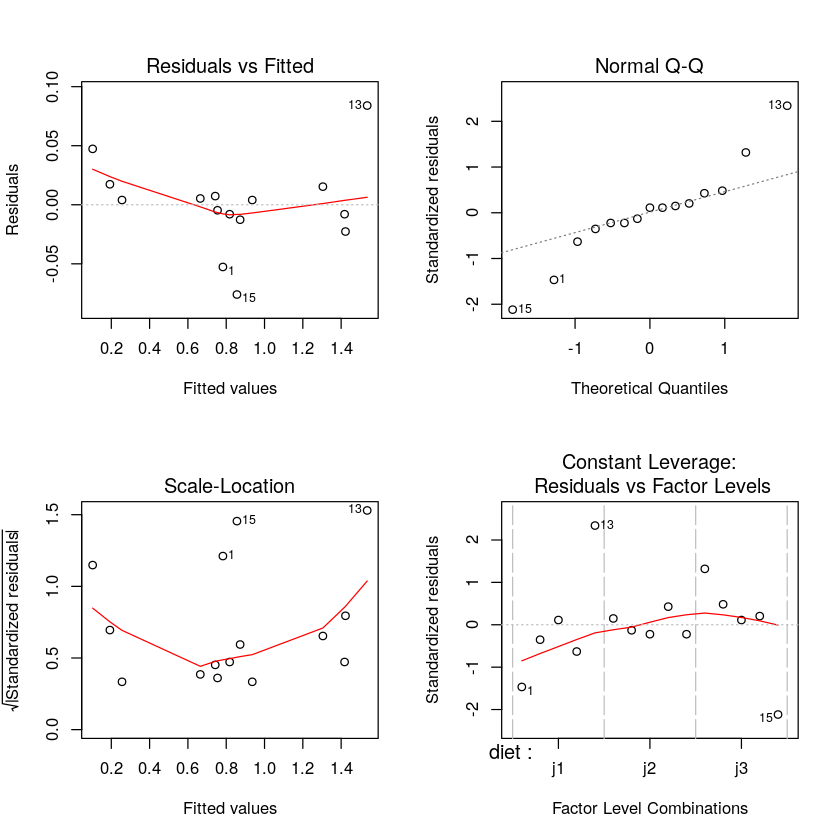

In [5]:
par(mfrow=c(2,2))
plot(aov(fat.lm))

- From the Residual vs. Fitted plot we can see that for each vertical line of points representing
a different treatment, the spread on the points appear to be approximately equal, indicating that these 3 treatments have the same variance. So the assumption of constant variance is not violated.

- From the QQ-plot above we could conclude that since not all the points fall on the dotted line,
thus the residuals are not normal, it also appears to be heavy tailed.

### (c)

(c) Plot the response $Y_{ij}$ by blocks (Present the lipid levels for each kind of diet by block). What
does this plot suggest about the appropriateness of the no-interaction assumption here?

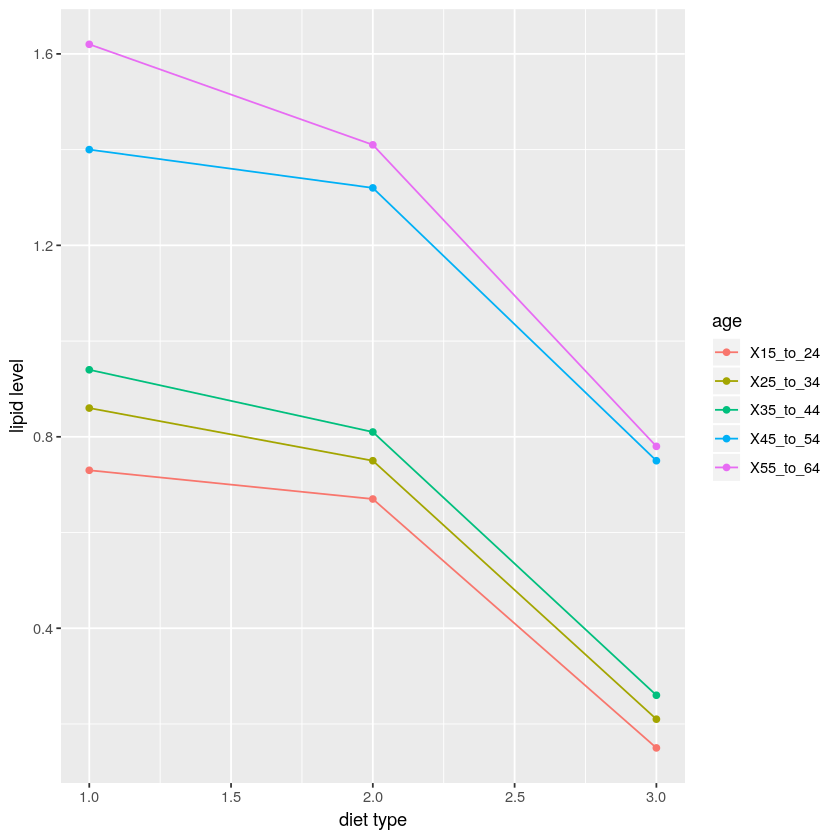

In [69]:
library(ggplot2)
library(reshape2)

dataset = "
diet 15_to_24   25_to_34  35_to_44   45_to_54   55_to_64  
1   0.73    0.86    0.94    1.40    1.62   
2   0.67    0.75    0.81    1.32    1.41    
3   0.15    0.21    0.26    0.75    0.78"

df = read.table(text=dataset, header = TRUE)

melted_data = melt(df, id.vars = "diet",
            variable.name="age", value.name="fat") 

ggplot(melted_data, aes(x = diet, y = fat, color=age)) + geom_point() + geom_line() + xlab('diet type') + ylab('lipid level')

The no-interaction assumption is appropriate here since all five lines are approximately parallel.

## Q2

2. (40 points) (By hand) Refer to the Fat in diets problem. Assume that randomized block model is
appropriate.


### (a)

(a) Obtain the analysis of variance table.

$$\bar y_{.j1} = 1.11$$
$$\bar y_{.j2} = 0.992$$
$$\bar y_{.j3} = 0.43$$

$$\bar y_{age1.} = 0.517$$
$$\bar y_{age2.} = 0.607$$
$$\bar y_{age3.} = 0.67$$
$$\bar y_{age4.} = 1.157$$
$$\bar y_{age5.} = 1.27$$

$$\bar y_{..} = 0.844$$

$$SST_{diet} =  5 \cdot (1.11-0.844)^2 + 5 \cdot(0.992-0.844)^2 + 5\cdot(0.43-0.844)^2=1.32028$$

$$SSBlock = 3 \cdot(0.517-0.844)^2 + 3 \cdot(0.607-0.844)^2 + 3 \cdot(0.67-0.844)^2 + 3 \cdot(1.157-0.844)^2 + 3 \cdot(1.27-0.844)^2 = 1.41896$$

$$SSTOTAL = (0.73-0.844)^2+(0.67-0.844)^2+(0.15-0.844)^2+(0.86-0.844)^2+(0.75-0.844)^2+(0.21-0.844)^2+(0.94-0.844)^2+(0.81-0.844)^2+(0.26-0.844)^2+(1.4-0.844)^2+(1.32-0.844)^2+(0.75-0.844)^2+(1.62-0.844)^2+(1.41-0.844)^2+(0.78-0.844)^2 = 2.75856$$


$$SSE = SSTOTAL - SST - SSBlock = 2.75856 - 1.32028 - 1.41896 = 0.01932$$

$$MSB = \frac{SST}{3-1} = 0.660140$$

$$MSBlock = \frac{SSBlock}{5-1} = 0.354740$$


$$MSE = \frac{SST}{(3-1)(5-1)} = 0002415$$

$$F_{diet} = \frac{MSB}{MSE} = \frac{0.660140}{0.002415} = 273.3409$$

$$F_{block} =\frac{MSBlock}{MSE} = \frac{0.354740}{0.002415} = 146.8903$$



In [35]:
# check my answer
library(knitr)
library(lsmeans)
aov.fat = aov(fat ~ diet+age, data=df)
kable(anova(aov.fat), format='markdown')

The 'lsmeans' package is being deprecated.
Users are encouraged to switch to 'emmeans'.
See help('transition') for more information, including how
to convert 'lsmeans' objects and scripts to work with 'emmeans'.




|          | Df|  Sum Sq|  Mean Sq|  F value| Pr(>F)|
|:---------|--:|-------:|--------:|--------:|------:|
|diet      |  2| 1.32028| 0.660140| 273.3499|  0e+00|
|age       |  4| 1.41896| 0.354740| 146.8903|  2e-07|
|Residuals |  8| 0.01932| 0.002415|       NA|     NA|

### (b) 

Test whether or not the mean reductions in lipid level differ for the three diets; use α = 0.05.
State the alternatives, decision rule, and conclusion. What is the P-value of the test?

__Null Hypothesis:__

$$H_0: \tau_1 = \tau_2 = \tau_3 = 0$$

$$H_a: \text{ there exists at least one } \tau_i \text{ that's not equal to } 0$$

And from the calculation in question part (a), we get the p-value of diet as:



In [1]:
p_value = 0e+00
p_value < 0.05

[1] TRUE

Since p-value $<0.05$, thus we are confident enough to reject the null hypothesis that $H_0: \tau_1 = \tau_2 = \tau_3 = 0$, indicating that  the mean reductions in lipid level differ for the three diets.

### (c)

(c) If there is significant difference in lipid level, how do they differ?

In [40]:
TukeyHSD(aov(fat.lm),"diet")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = fat.lm)

$diet
        diff        lwr         upr     p adj
j2-j1 -0.118 -0.2068109 -0.02918909 0.0129653
j3-j1 -0.680 -0.7688109 -0.59118909 0.0000000
j3-j2 -0.562 -0.6508109 -0.47318909 0.0000002


## Q3

3. (45 points) (ANCOVA) A manufacturer of felt-tip markers investigated by an experiment whether a
proposed new display, featuring a picture of a physician, is more effective in drugstores than the present
counter display, featuring a picture of an athlete and designed to be located in the stationary area.
Fifteen drugstores of similar characteristics were chosen for the study. They were assigned at random
in equal numbers to one of the following treatments: (1) present counter display in stationary area, (2)
new display in stationary area, (3) new display in checkout area. Sales with the present display (X it )
were recorded in all 15 stores for a three week period. Then the new display was set up in the 10 stores
receiving it, and sales for the next three week period (Y it ) were recorded in all 15 stores. The data on
sales (in dollars) follow.


![](2.png)

The analyst wishes to analyze the effects of the three different display treatments by means of covariance
analysis.

### (a)

(a) Obtain the residuals for covariance model $Y_{it} = \mu + \tau_{i}+ \gamma(X_{it} - \bar X_{..} ) + \epsilon_{it}$.


In [86]:
x =  c(92,68,74,52,65,
       77,80,70,73,79,
       64,43,81,68,71)
sales = c(69,44,58,38,54,
          74,75,73,78,82,
          66,49,84,75,77)
time = rep(c("t1", "t2", "t3", "t4", "t5"), 3)
display = c(rep("i1", 5), rep("i2", 5), rep("i3", 5))
df = data.frame(x, sales, display, time)
df

x,sales,display,time
92,69,i1,t1
68,44,i1,t2
74,58,i1,t3
52,38,i1,t4
65,54,i1,t5
77,74,i2,t1
80,75,i2,t2
70,73,i2,t3
73,78,i2,t4
79,82,i2,t5


In [31]:
sales.lm = lm(sales ~ I(x-mean(x)) + display, data=df) 
sales.res = resid(sales.lm)
display_1_res = sales.res[1:5]
display_2_res = sales.res[6:10]
display_3_res = sales.res[11:15]
display_1_res
display_2_res
display_3_res

1          2          3          4          5 
-1.7972846 -6.7635768  2.2279963  0.5922285  5.7406367

6         7         8         9        10 
-3.401685 -4.905899  1.441479  3.937266  2.928839

11         12         13         14         15 
-3.0313670 -2.5018727  0.7780899  2.6296816  2.1254682

### (b)

(b) For each treatment, plot the residuals against the fitted values. Also prepare a normal probability
plot of the residuals.

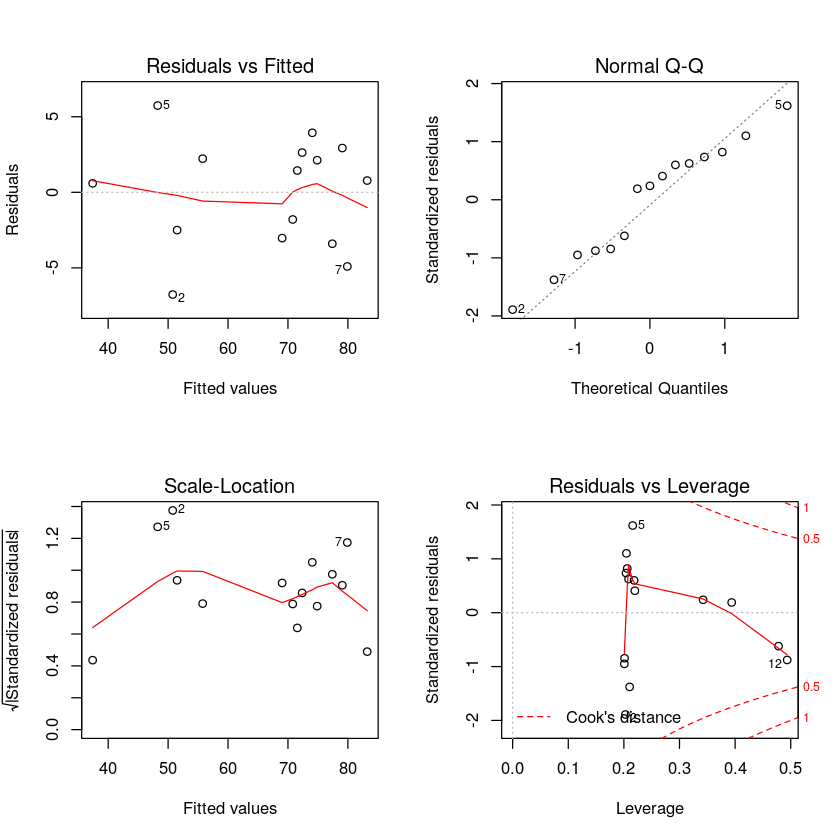

In [32]:
par(mfrow=c(2,2))
plot(aov(sales.lm))

- From the Residual vs. Fitted plot we can see that for each vertical line of points representing a different treatment, the spread on the points appear to be approximately equal, indicating that these 3 treatments have the same variance. So the assumption of constant variance is not violated.

- From the QQ-plot above we could conclude that since almost all the points fall on the dotted line, thus the residuals are normal.

### (c)

Assume ANOVA with equal slope models, i.e., $Y_{it} = \mu + \tau_i + \gamma(X_{it}- \bar X_{..} ) + \epsilon_{it}$. 
Test for whether
the slope is significant. Conduct the test using $\alpha$ = 0.05. 
State the alternatives, decision rule, and
conclusion. What is the P-value of the test?


$$Y_{1t} = \mu + \tau_1 + \gamma_1(X_{1t}- \bar X_{..} ) + \epsilon_{1t}$$
$$Y_{2t} = \mu + \tau_2 + \gamma_2(X_{2t}- \bar X_{..} ) + \epsilon_{2t}$$
$$Y_{3t} = \mu + \tau_3 + \gamma_3(X_{3t}- \bar X_{..} ) + \epsilon_{3t}$$

$$H_0: \gamma_1 = \gamma_2 = \gamma_3 $$

$$H_a: \text{ there exists at least one } \gamma_i \text{ that's different from the other two}$$




In [96]:
aov.sales = aov(sales ~ display+time)
kable(anova(aov.sales), format='markdown')



|          | Df|     Sum Sq|     Mean Sq|  F value|    Pr(>F)|
|:---------|--:|----------:|-----------:|--------:|---------:|
|x         |  1| 1317.78912| 1317.789116| 385.5442| 0.0000002|
|display   |  2| 1397.28092|  698.640461| 204.4005| 0.0000006|
|time      |  4|  152.60398|   38.150995|  11.1618| 0.0036899|
|Residuals |  7|   23.92598|    3.417997|       NA|        NA|

In [91]:
lm(df$sales[df$display=='i1'] ~ df$x[df$display=='i1'])


Call:
lm(formula = df$sales[df$display == "i1"] ~ df$x[df$display == 
    "i1"])

Coefficients:
             (Intercept)  df$x[df$display == "i1"]  
                 -1.3506                    0.7685  


### (d)

(d) Fit the full and reduced regression models and test for treatment effects: use $\alpha = 0.05$. State the
alternatives, decision rule, and conclusion. What is the P-value of the test?